# Chapter 6 - NYC Taxi Full Example

http://chriswhong.com/open-data/foil_nyc_taxi/

http://www.andresmh.com/nyctaxitrips/

Potential models

* Will the passenger tip the driver?
* Will the trip take longer than average?
* Will the fare be higher than average?

In [1]:
import pandas
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data exploration

In [2]:
N = 5e6
data = pandas.read_csv("trip_data_1.csv", nrows=N)

In [3]:
fare_data = pandas.read_csv("trip_fare_1.csv", nrows=N)
fare_cols = [u' payment_type', u' fare_amount', u' surcharge', u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount']
data = data.join(fare_data[fare_cols])
del fare_data
data[:10]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,40.757977,-73.989838,40.751171,CSH,6.5,0.0,0.5,0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,40.731781,-73.994499,40.750660,CSH,6.0,0.5,0.5,0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,40.737770,-74.009834,40.726002,CSH,5.5,1.0,0.5,0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,40.759945,-73.984734,40.759388,CSH,5.0,0.5,0.5,0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,40.748528,-74.002586,40.747868,CSH,9.5,0.5,0.5,0,0.0,10.5
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N,2013-01-07 15:27:48,2013-01-07 15:38:37,1,648,1.7,...,40.764252,-73.983322,40.743763,CSH,9.5,0.0,0.5,0,0.0,10.0
6,496644932DF3932605C22C7926FF0FE0,513189AD756FF14FE670D10B92FAF04C,CMT,1,N,2013-01-08 11:01:15,2013-01-08 11:08:14,1,418,0.8,...,40.743977,-74.007416,40.744343,CSH,6.0,0.0,0.5,0,0.0,6.5
7,0B57B9633A2FECD3D3B1944AFC7471CF,CCD4367B417ED6634D986F573A552A62,CMT,1,N,2013-01-07 12:39:18,2013-01-07 13:10:56,3,1898,10.7,...,40.756775,-73.865250,40.770630,CSH,34.0,0.0,0.5,0,4.8,39.3
8,2C0E91FF20A856C891483ED63589F982,1DA2F6543A62B8ED934771661A9D2FA0,CMT,1,N,2013-01-07 18:15:47,2013-01-07 18:20:47,1,299,0.8,...,40.743137,-73.982712,40.735336,CSH,5.5,1.0,0.5,0,0.0,7.0
9,2D4B95E2FA7B2E85118EC5CA4570FA58,CD2F522EEE1FF5F5A8D8B679E23576B3,CMT,1,N,2013-01-07 15:33:28,2013-01-07 15:49:26,2,957,2.5,...,40.786983,-73.952919,40.806370,CSH,13.0,0.0,0.5,0,0.0,13.5


In [46]:
data.ix[:5, data.columns[:5]]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag
0,CD847FE5884F10A28217E9FBA11B275B,5FEFD00D9773268B72EE4E879852F190,CMT,1,N
1,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N
2,A954A71B6D44265AE756BF807E069396,D5CA7D478A14BA3BBFC20153C5C88B1A,CMT,1,N
3,F6F7D02179BE915B23EF2DB57836442D,088879B44B80CC9ED43724776C539370,VTS,1,0
4,BE386D8524FCD16B3727DCF0A32D9B25,4EB96EC9F3A42794DEE233EC8A2616CE,VTS,1,0
5,E9FF471F36A91031FE5B6D6228674089,72E0B04464AD6513F6A613AABB04E701,VTS,1,0


(0, 300)

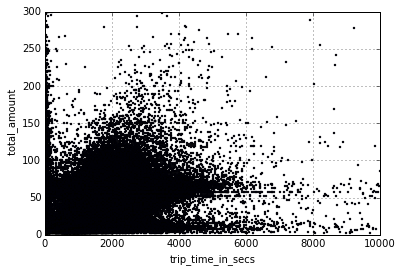

In [5]:
data.plot(x="trip_time_in_secs", y=" total_amount", kind="scatter", s=2)
xlim(0,1e4)
ylim(0,300)

In [44]:
ind = where(logical_and(data.trip_time_in_secs < 500, data[' total_amount'] > 30))[0]
data = data.drop(ind)

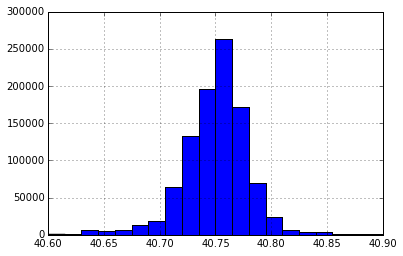

In [218]:
data[logical_and(data.dropoff_latitude > 40.6,data.dropoff_latitude < 40.9)].dropoff_latitude.hist(bins=20);

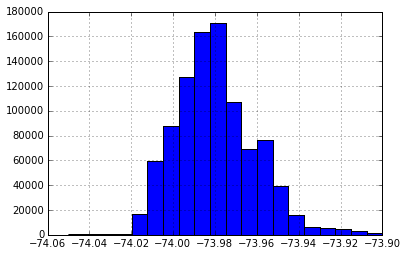

In [231]:
data[logical_and(data.dropoff_longitude > -74.05,data.dropoff_longitude < -73.9)].dropoff_longitude.hist(bins=20);

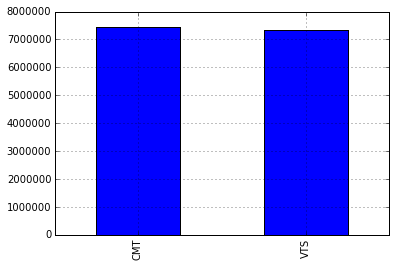

In [3]:
data.vendor_id.value_counts().plot(kind="bar");

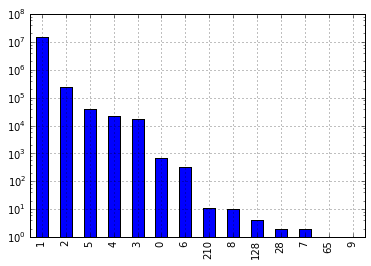

In [4]:
data.rate_code.value_counts().plot(kind="bar", logy=True, ylim=(1,1e8));

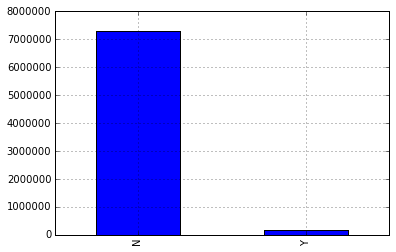

In [5]:
data.store_and_fwd_flag.value_counts().plot(kind="bar");

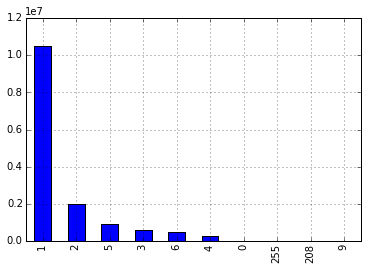

In [16]:
data.passenger_count.value_counts().plot(kind="bar");

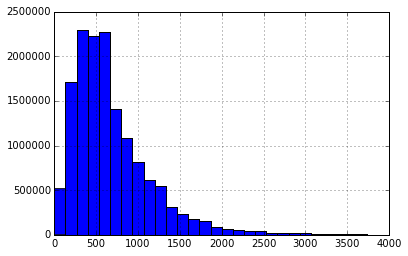

In [19]:
data.trip_time_in_secs[data.trip_time_in_secs < 4000].hist(bins=30);

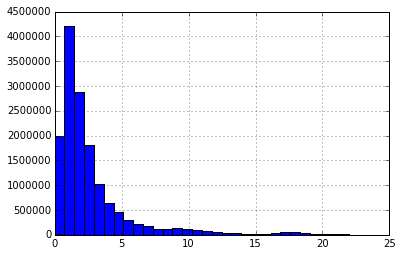

In [21]:
data.trip_distance[data.trip_distance < 22].hist(bins=30);

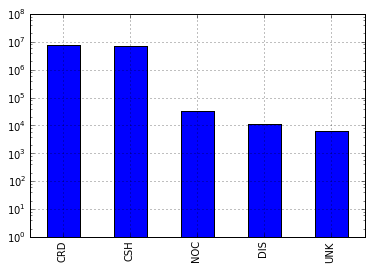

In [6]:
data[' payment_type'].value_counts().plot(kind="bar", logy=True, ylim=(1,1e8));

(0, 40)

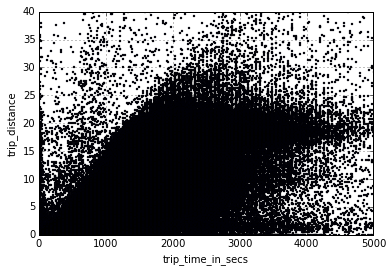

In [6]:
data.plot(x="trip_time_in_secs", y="trip_distance", kind="scatter", s=2)
xlim(0,5000)
ylim(0,40)

(-74.05, -73.9)

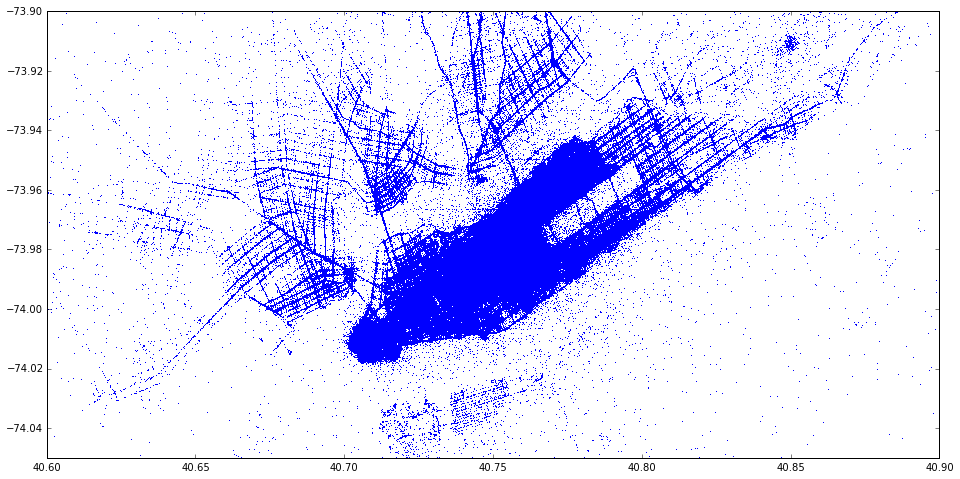

In [9]:
figure(figsize=(16,8))
plot(data["pickup_latitude"], data["pickup_longitude"], 'b,')
xlim(40.6, 40.9)
ylim(-74.05, -73.9)

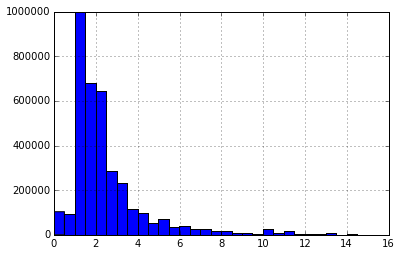

In [6]:
data[data[' tip_amount'] < 15][' tip_amount'].hist(bins=30);

In [4]:
len(data)
data = data[data[' payment_type'] != "CSH"]
data.reset_index(inplace=True, drop=True)
len(data)

3633518

## Building first model

In [5]:
# Setup target
data['tipped'] = (data[' tip_amount'] > 0).astype("int")
data['tipped'].value_counts()

1    3538547
0      94971
dtype: int64

In [6]:
feats1 = [u'rate_code', 'passenger_count', u'trip_time_in_secs', u'trip_distance', u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude', ' fare_amount', u' surcharge', u' mta_tax', ' tolls_amount']

In [7]:
M = len(data)
rand_idx = arange(M)
random.shuffle(rand_idx)
train_idx = rand_idx[int(M*0.2):]
test_idx = rand_idx[:int(M*0.2)]

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data[feats1])
data_scaled[train_idx.tolist(),:].shape

(2906815, 12)

In [27]:
sgd = SGDClassifier(loss="modified_huber")
sgd.fit(data.ix[train_idx,feats1], data['tipped'].ix[train_idx])

SGDClassifier(alpha=0.0001, class_weight=None, epsilon=0.1, eta0=0.0,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='modified_huber', n_iter=5, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=False, verbose=0,
       warm_start=False)

In [28]:
preds = sgd.predict_proba(data.ix[test_idx,feats1])

In [29]:
fpr, tpr, thr = roc_curve(data['tipped'].ix[test_idx], preds[:,1])
auc = roc_auc_score(data['tipped'].ix[test_idx], preds[:,1])

In [30]:
auc

0.5053715706684706

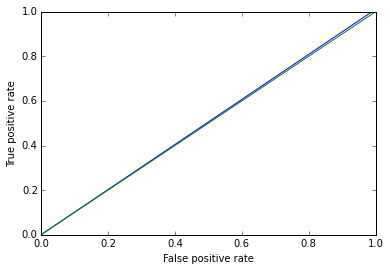

In [41]:
plot(fpr,tpr)
plot(fpr,fpr)
xlabel("False positive rate")
ylabel("True positive rate")

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
data.fillna(0, inplace=True)
count_nonzero(pandas.isnull(data.ix[train_idx,feats1]))

0

In [33]:
rf1 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf1.fit(data.ix[train_idx,feats1], data['tipped'].ix[train_idx])

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0)

In [34]:
preds1 = rf1.predict_proba(data.ix[test_idx,feats1])

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

In [36]:
fpr1, tpr1, thr1 = roc_curve(data['tipped'].ix[test_idx], preds1[:,1])
auc1 = roc_auc_score(data['tipped'].ix[test_idx], preds1[:,1])

In [ ]:
print auc1
rf1.score(data.ix[test_idx,feats1], data.ix[test_idx,'tipped'])

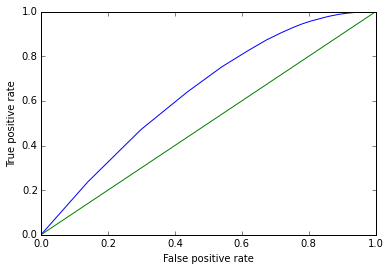

In [42]:
plot(fpr1,tpr1)
plot(fpr1,fpr1)
xlabel("False positive rate")
ylabel("True positive rate")

In [44]:
fi = zip(feats1, rf1.feature_importances_)
fi.sort(key=lambda x: -x[1])
pandas.DataFrame(fi, columns=["Feature","Importance"])

,Feature,Importance
0,dropoff_latitude,0.165411
1,dropoff_longitude,0.163337
2,pickup_latitude,0.163068
3,pickup_longitude,0.160285
4,trip_time_in_secs,0.122214
5,trip_distance,0.112020
6,fare_amount,0.067795
7,passenger_count,0.017850
8,surcharge,0.014259
9,rate_code,0.006974


### Features 2

In [45]:
data['trip_time_in_secs'][data['trip_time_in_secs'] < 1e-3] = -1
data['speed'] = data['trip_distance'] / data['trip_time_in_secs']

-c:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
feats2 = feats1 + ['speed']
feats2.remove('trip_time_in_secs')

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf2.fit(data.ix[train_idx,feats2], data['tipped'].ix[train_idx])

In [ ]:
preds2 = rf2.predict_proba(data.ix[test_idx,feats2])

In [ ]:
fpr2, tpr2, thr2 = roc_curve(data['tipped'].ix[test_idx], preds2[:,1])
auc2 = roc_auc_score(data['tipped'].ix[test_idx], preds2[:,1])

In [ ]:
print auc2
plot(fpr2,tpr2)
plot(fpr2,fpr2)

In [ ]:
fi2 = zip(feats2, rf2.feature_importances_)
fi2.sort(key=lambda x: x[1])
fi2

### Features 3

In [11]:
feats3 = feats1

In [12]:
feats3

[u'rate_code',
 'passenger_count',
 u'trip_time_in_secs',
 u'trip_distance',
 u'pickup_longitude',
 u'pickup_latitude',
 u'dropoff_longitude',
 u'dropoff_latitude',
 ' fare_amount',
 u' surcharge',
 u' mta_tax',
 ' tolls_amount']

In [13]:
from sklearn.feature_extraction import DictVectorizer

In [14]:
def cat_to_num(data):
    categories = unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s:%s"%(data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)

In [15]:
payment_type_cats = cat_to_num(data[' payment_type'])
vendor_id_cats = cat_to_num(data['vendor_id'])
store_and_fwd_flag_cats = cat_to_num(data['store_and_fwd_flag'])
rate_code = cat_to_num(data['rate_code'])

In [16]:
data = data.join(payment_type_cats)
feats3 += payment_type_cats.columns
data = data.join(vendor_id_cats)
feats3 += vendor_id_cats.columns
data = data.join(store_and_fwd_flag_cats)
feats3 += store_and_fwd_flag_cats.columns
data = data.join(rate_code)
feats3 += rate_code.columns

In [17]:
feats3

[u'rate_code',
 'passenger_count',
 u'trip_time_in_secs',
 u'trip_distance',
 u'pickup_longitude',
 u'pickup_latitude',
 u'dropoff_longitude',
 u'dropoff_latitude',
 ' fare_amount',
 u' surcharge',
 u' mta_tax',
 ' tolls_amount',
 ' payment_type:CRD',
 ' payment_type:DIS',
 ' payment_type:NOC',
 ' payment_type:UNK',
 'vendor_id:CMT',
 'vendor_id:VTS',
 'store_and_fwd_flag:0',
 'store_and_fwd_flag:N',
 'store_and_fwd_flag:Y',
 'rate_code:0',
 'rate_code:1',
 'rate_code:2',
 'rate_code:210',
 'rate_code:28',
 'rate_code:3',
 'rate_code:4',
 'rate_code:5',
 'rate_code:6',
 'rate_code:8']

In [18]:
rf3 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf3.fit(data.ix[train_idx,feats3], data['tipped'].ix[train_idx])

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0)

In [ ]:
rf3.score(data.ix[test_idx,feats3], data.ix[test_idx,'tipped'])

0.655894612736


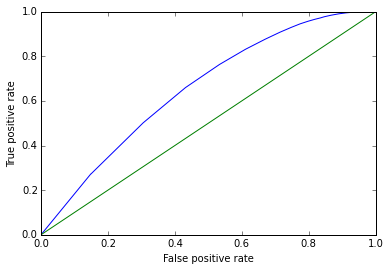

In [23]:
fpr3, tpr3, thr3 = roc_curve(data['tipped'].ix[test_idx], preds3[:,1])
auc3 = roc_auc_score(data['tipped'].ix[test_idx], preds3[:,1])
print auc3
plot(fpr3,tpr3)
plot(fpr3,fpr3)
xlabel("False positive rate")
ylabel("True positive rate")

In [25]:
fi3 = zip(feats3, rf3.feature_importances_)
fi3.sort(key=lambda x: -x[1])
pandas.DataFrame(fi3, columns=["Feature","Importance"])

,Feature,Importance
0,dropoff_latitude,0.163023
1,pickup_latitude,0.161114
2,dropoff_longitude,0.160988
3,pickup_longitude,0.158672
4,trip_time_in_secs,0.111172
5,trip_distance,0.106693
6,fare_amount,0.067567
7,passenger_count,0.019286
8,surcharge,0.010330
9,payment_type:NOC,0.008361


### Features 4

In [26]:
feats4 = feats3

In [27]:
# Datetime features (hour of day, day of week, week of year)
pickup = pandas.to_datetime(data['pickup_datetime'])
dropoff = pandas.to_datetime(data['dropoff_datetime'])
data['pickup_hour'] = pickup.apply(lambda e: e.hour)
data['pickup_day'] = pickup.apply(lambda e: e.dayofweek)
#data['pickup_week'] = pickup.apply(lambda e: e.week)
data['dropoff_hour'] = dropoff.apply(lambda e: e.hour)
data['dropoff_day'] = dropoff.apply(lambda e: e.dayofweek)
#data['dropoff_week'] = dropoff.apply(lambda e: e.week)

In [28]:
feats4 += ['pickup_hour', 'pickup_day', 'dropoff_hour', 'dropoff_day']

In [15]:
feats4

[u'rate_code',
 'passenger_count',
 u'trip_time_in_secs',
 u'trip_distance',
 u'pickup_longitude',
 u'pickup_latitude',
 u'dropoff_longitude',
 u'dropoff_latitude',
 ' fare_amount',
 u' surcharge',
 u' mta_tax',
 ' tolls_amount',
 'pickup_hour',
 'pickup_day',
 'pickup_week',
 'dropoff_hour',
 'dropoff_day',
 'dropoff_week']

In [29]:
rf4 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf4.fit(data.ix[train_idx,feats4], data['tipped'].ix[train_idx])

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0)

In [33]:
preds4 = rf4.predict_proba(data.ix[test_idx,feats4])
rf4.score(data.ix[test_idx,feats4], data.ix[test_idx,'tipped'])

0.97507922768999167

0.662020800456


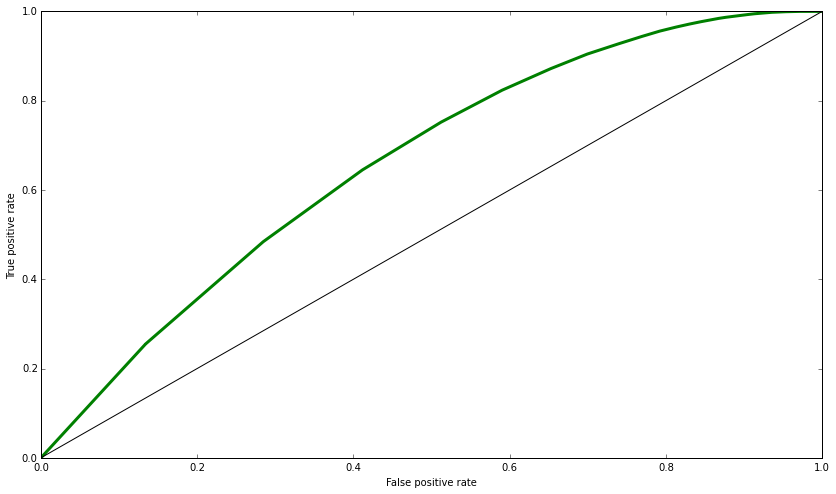

In [31]:
fpr4, tpr4, thr4 = roc_curve(data['tipped'].ix[test_idx], preds4[:,1])
auc4 = roc_auc_score(data['tipped'].ix[test_idx], preds4[:,1])
print auc4
figure(figsize=(14,8))
plot(fpr4,tpr4, "g-", linewidth=3)
plot(fpr4,fpr4, "k-", linewidth=1)
xlabel("False positive rate")
ylabel("True positive rate")

In [32]:
fi4 = zip(feats4, rf4.feature_importances_)
fi4.sort(key=lambda x: -x[1])
pandas.DataFrame(fi4, columns=["Feature","Importance"])

,Feature,Importance
0,dropoff_latitude,1.342966e-01
1,dropoff_longitude,1.332890e-01
2,pickup_latitude,1.326898e-01
3,pickup_longitude,1.314082e-01
4,trip_time_in_secs,1.000610e-01
5,trip_distance,9.924300e-02
6,fare_amount,7.099682e-02
7,dropoff_hour,3.942205e-02
8,pickup_hour,3.924598e-02
9,pickup_day,2.417833e-02


In [59]:
data.ix[data[' payment_type:CSH'] == 1,'tipped'].value_counts()

0    987113
1        21
dtype: int64

(-74.05, -73.9)

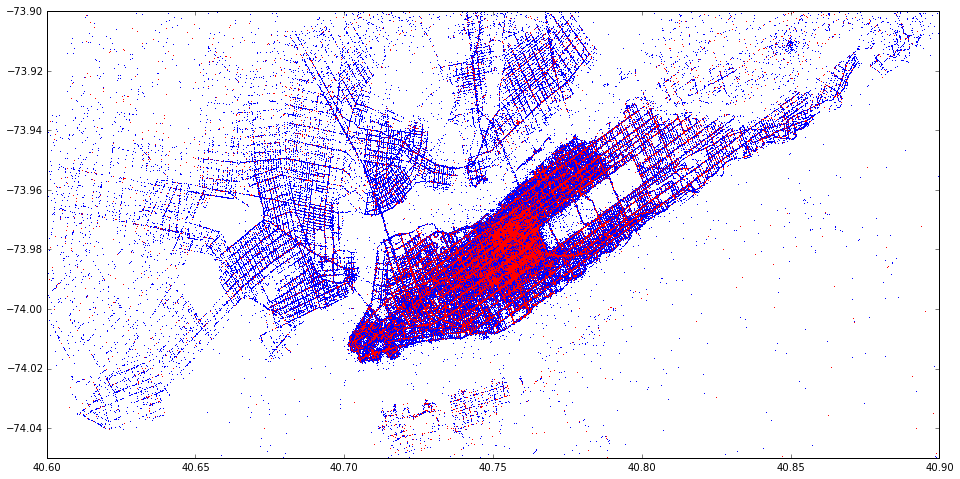

In [242]:
figure(figsize=(16,8))
plot(data[data['tipped'] == True]["dropoff_latitude"], data[data['tipped'] == True]["dropoff_longitude"], 'b,')
plot(data[data['tipped'] == False]["dropoff_latitude"], data[data['tipped'] == False]["dropoff_longitude"], 'r,')
xlim(40.6, 40.9)
ylim(-74.05, -73.9)